In [300]:
from IPython.core.display import HTML;css_file = '../../my.css';HTML(open(css_file, "r").read())

In [301]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [302]:
data = pd.read_csv("../parkinsons_updrs.data")

In [303]:
data.head(5)

,age,sex,test_time,motor_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,72,0,5.6431,28.199,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,72,0,12.6660,28.447,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,72,0,19.6810,28.695,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,72,0,25.6470,28.905,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,72,0,33.6420,29.187,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [304]:
target = data.pop('motor_UPDRS')

In [305]:
data.head(5)

,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,72,0,5.6431,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,72,0,12.6660,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,72,0,19.6810,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,72,0,25.6470,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,72,0,33.6420,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


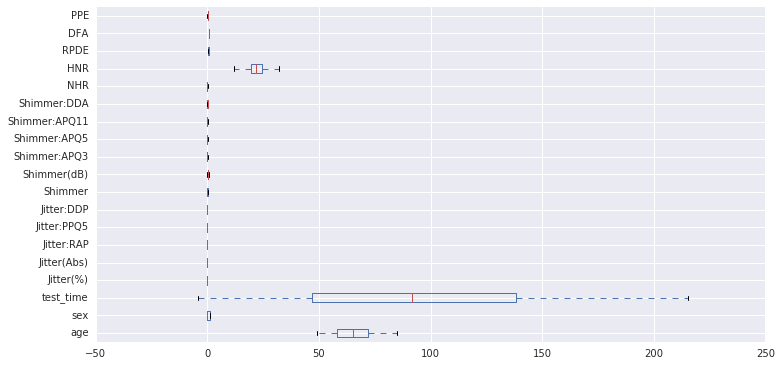

In [306]:
plt.figure(figsize=(12,6))
data.boxplot(vert=False)
plt.show()

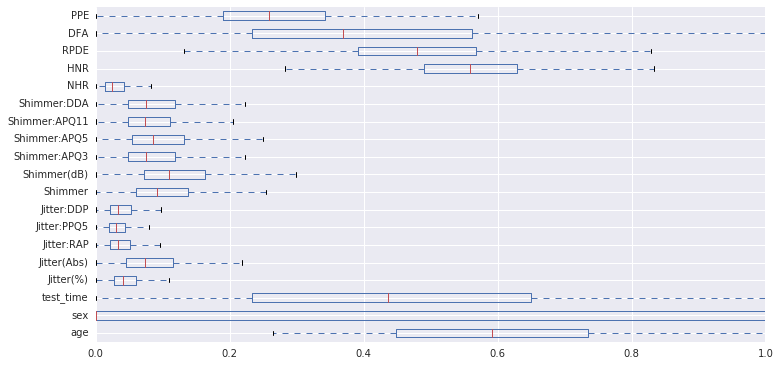

In [307]:
from sklearn.preprocessing import MinMaxScaler

data_cols = data.columns.values
scaler = MinMaxScaler()
scaler.fit(data)
data_norm = pd.DataFrame(scaler.transform(data),columns=data_cols)
plt.figure(figsize=(12,6))
data_norm.boxplot(vert=False)
plt.show()

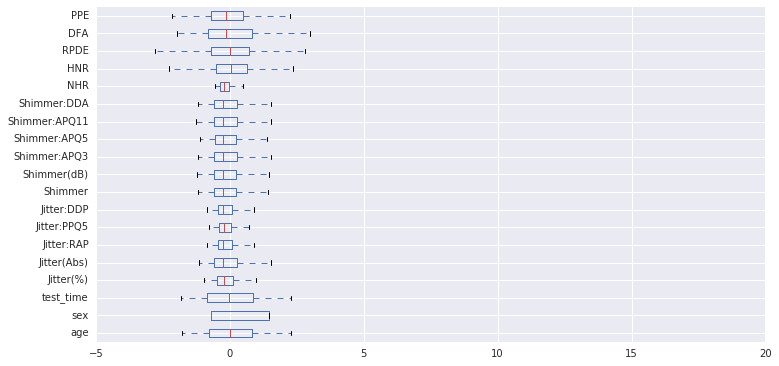

In [308]:
from sklearn.preprocessing import StandardScaler

data_cols = data.columns.values
scaler = StandardScaler()
scaler.fit(data)
data_norm = pd.DataFrame(scaler.transform(data),columns=data_cols)
plt.figure(figsize=(12,6))
data_norm.boxplot(vert=False)
plt.show()

Which one to use?? Log-scale!!

In [309]:
for c in to_log_transform:
    data[c] = np.log(data[c])

In [310]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(degree=3)
data=pd.DataFrame(polynomial_features.fit_transform(data))

In [311]:
data_cols = data.columns.values
scaler = StandardScaler()
scaler.fit(data)
data_norm = pd.DataFrame(scaler.transform(data),columns=data_cols)
#plt.figure(figsize=(12,16))
#data_norm.boxplot(vert=False)
#plt.show()

In [312]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

model = LinearRegression() #eta0 is the learning rate used for gradient descent
model.fit(data_norm,target)

print "R-squared = %f" % metrics.r2_score(target,model.predict(data_norm))

R-squared = 0.726375


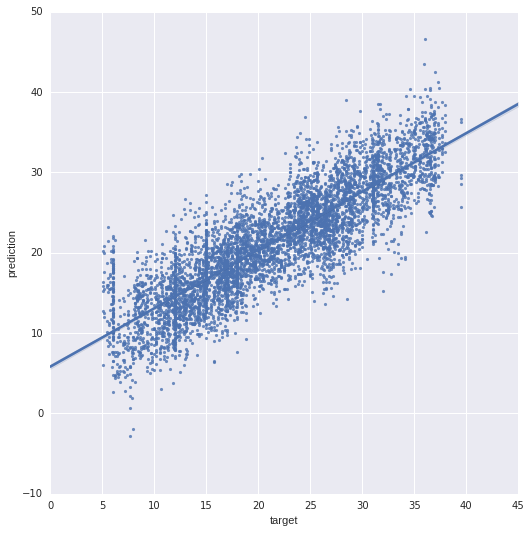

In [313]:
import seaborn as sns

tmp = pd.DataFrame()
tmp['target'] = target
tmp['prediction'] = model.predict(data_norm)

sns.lmplot(x="target", y="prediction", data=tmp, size=7.5, scatter_kws={"s": 10})
plt.show()